# Statistics 652 - Midterm-Final
## SAJITH GOWTHAMAN, NET ID:ek5282
* Prof. Eric A. Suess February 26, 2020
* For the titanic data set try the following machine learning classification algorithms. Use a training data set and a test data set.
* Build classification models for the Survived variable. Pick a model scoring function and determine which model is the best. I would suggest making a confusion matrix and compute the accuracy or kappa.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import cufflinks as cf
cf.go_offline()
import datetime
from sklearn import preprocessing


In [22]:
df = pd.read_csv('train.csv')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Data Cleaning

Ticket is an unneccesary variable that is of no use - I will drop it

In [24]:
df.drop(columns='Ticket', inplace = True, axis=1)

#### Let's one hot encode the "Name" with labeling for machine learning purpose

In [25]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df['Name'] = LE.fit_transform(df['Name'])
df['Name'].nunique()

891

#### Now for 'sex' and 'Embarked' variable, its better we get dummies instead of labeling as it contributes to the ML process.

In [26]:
df['Sex'] = pd.get_dummies(df['Sex'])
df['Embarked'] = pd.get_dummies(df['Embarked'])
df['Cabin'] = pd.get_dummies(df['Cabin'])

In [27]:
df['Fare'] = (round(df['Fare'], 2))
df['Age'] = (round(df['Age'], 2))

In [28]:
df.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

#### One if the imperatives : Checking for null values and dealing with them.

In [29]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [30]:
df['Age'].fillna(df['Age'].mean(), inplace = True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null int64
Sex            891 non-null uint8
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Cabin          891 non-null uint8
Embarked       891 non-null uint8
dtypes: float64(2), int64(6), uint8(3)
memory usage: 58.4 KB


## Exploratory Data Analysis

#### Outliers check

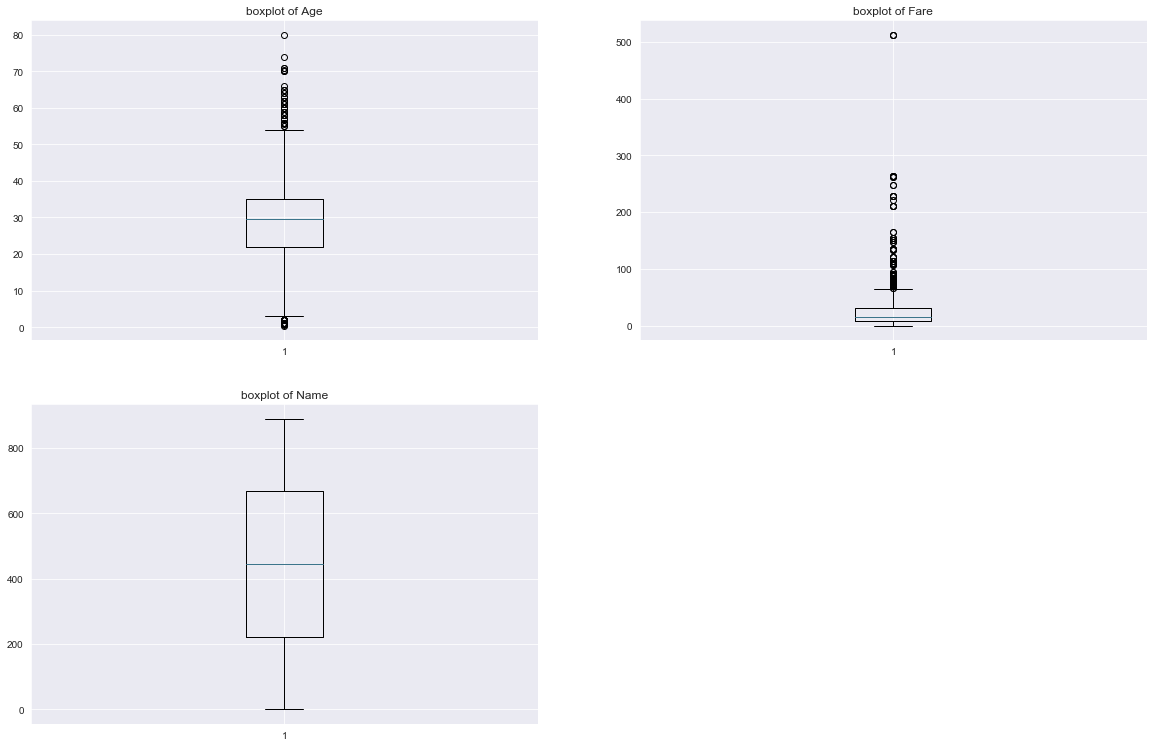

In [32]:
plt.figure(figsize = (20,20))

List = ['Age','Fare','Name']

for i, col in enumerate (List):
    plt.subplot(len(List),2,i+1)
    plt.boxplot(df[col])
    plt.title("boxplot of {}".format(col))
    
plt.show()


### We do notice a high number of outliers in the plots of 'Age' and 'Fare'. We can winsorize to partially eliminate which will improve our model!

In [33]:
from scipy.stats.mstats import winsorize

df["Age"] = winsorize(df["Age"], (0.10, 0.05))
df["Fare"] = winsorize(df["Fare"], (0, 0.05))

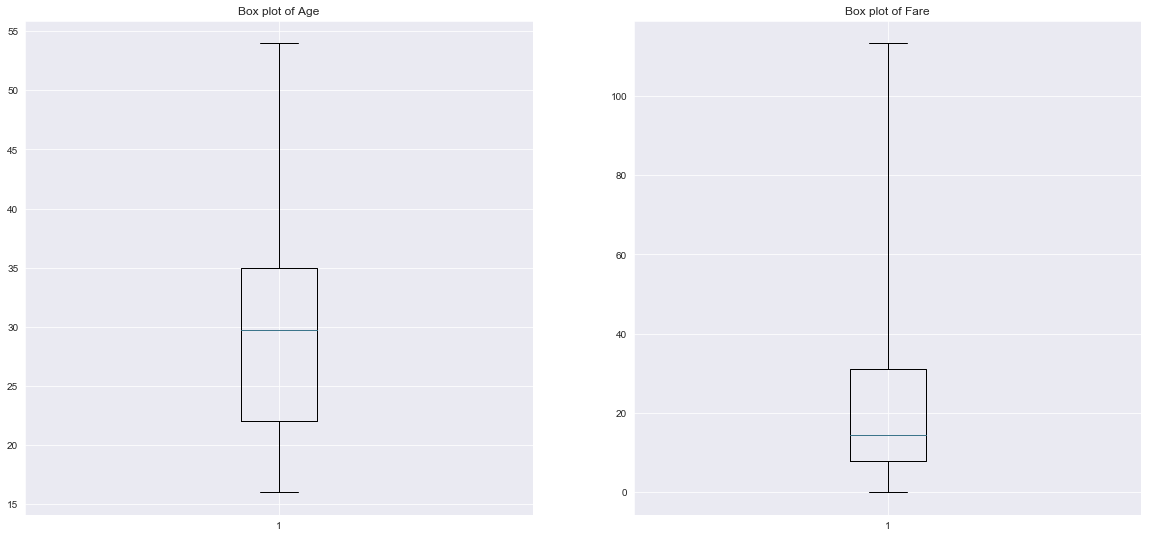

In [34]:
plt.figure(figsize = (20,20))

plt.subplot(2,2,1)
plt.boxplot(df["Age"], whis = 5)
plt.title("Box plot of Age")


plt.subplot(2,2,2)
plt.boxplot(df["Fare"], whis = 5)
plt.title("Box plot of Fare")
plt.show()

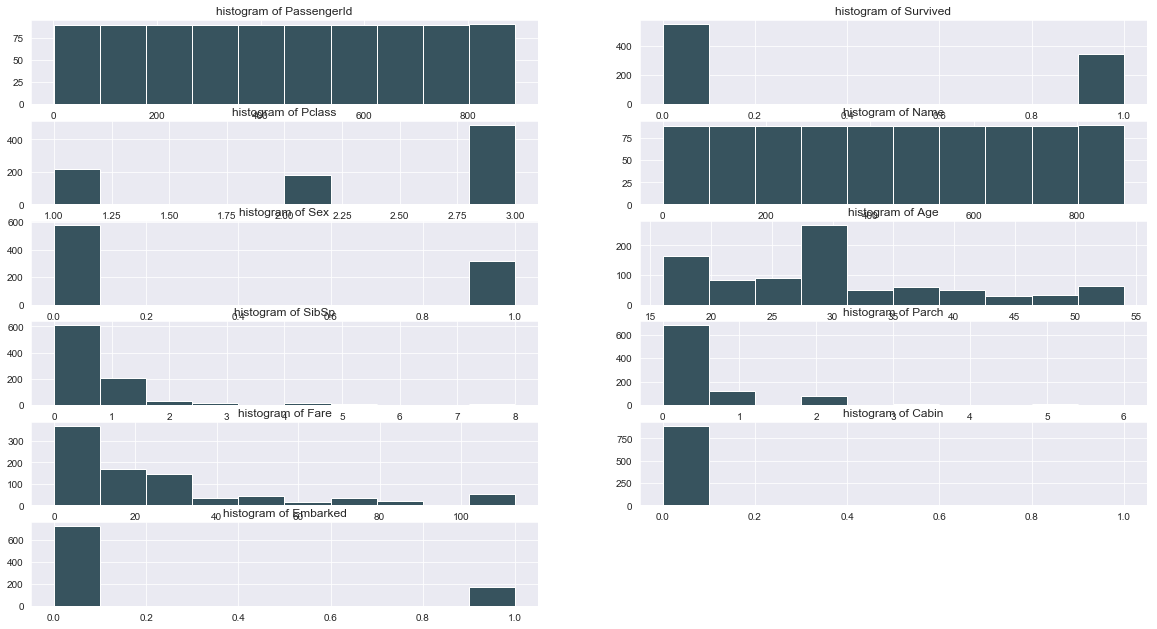

In [35]:
plt.figure(figsize = (20,20))

List = df.columns

for i, col in enumerate (List):
    plt.subplot(len(List),2,i+1)
    plt.hist((df[col]))
    plt.title("histogram of {}".format(col))
    
plt.show()

In [36]:
sns.set_palette("GnBu_d")
sns.set_style('darkgrid')

## Visualization

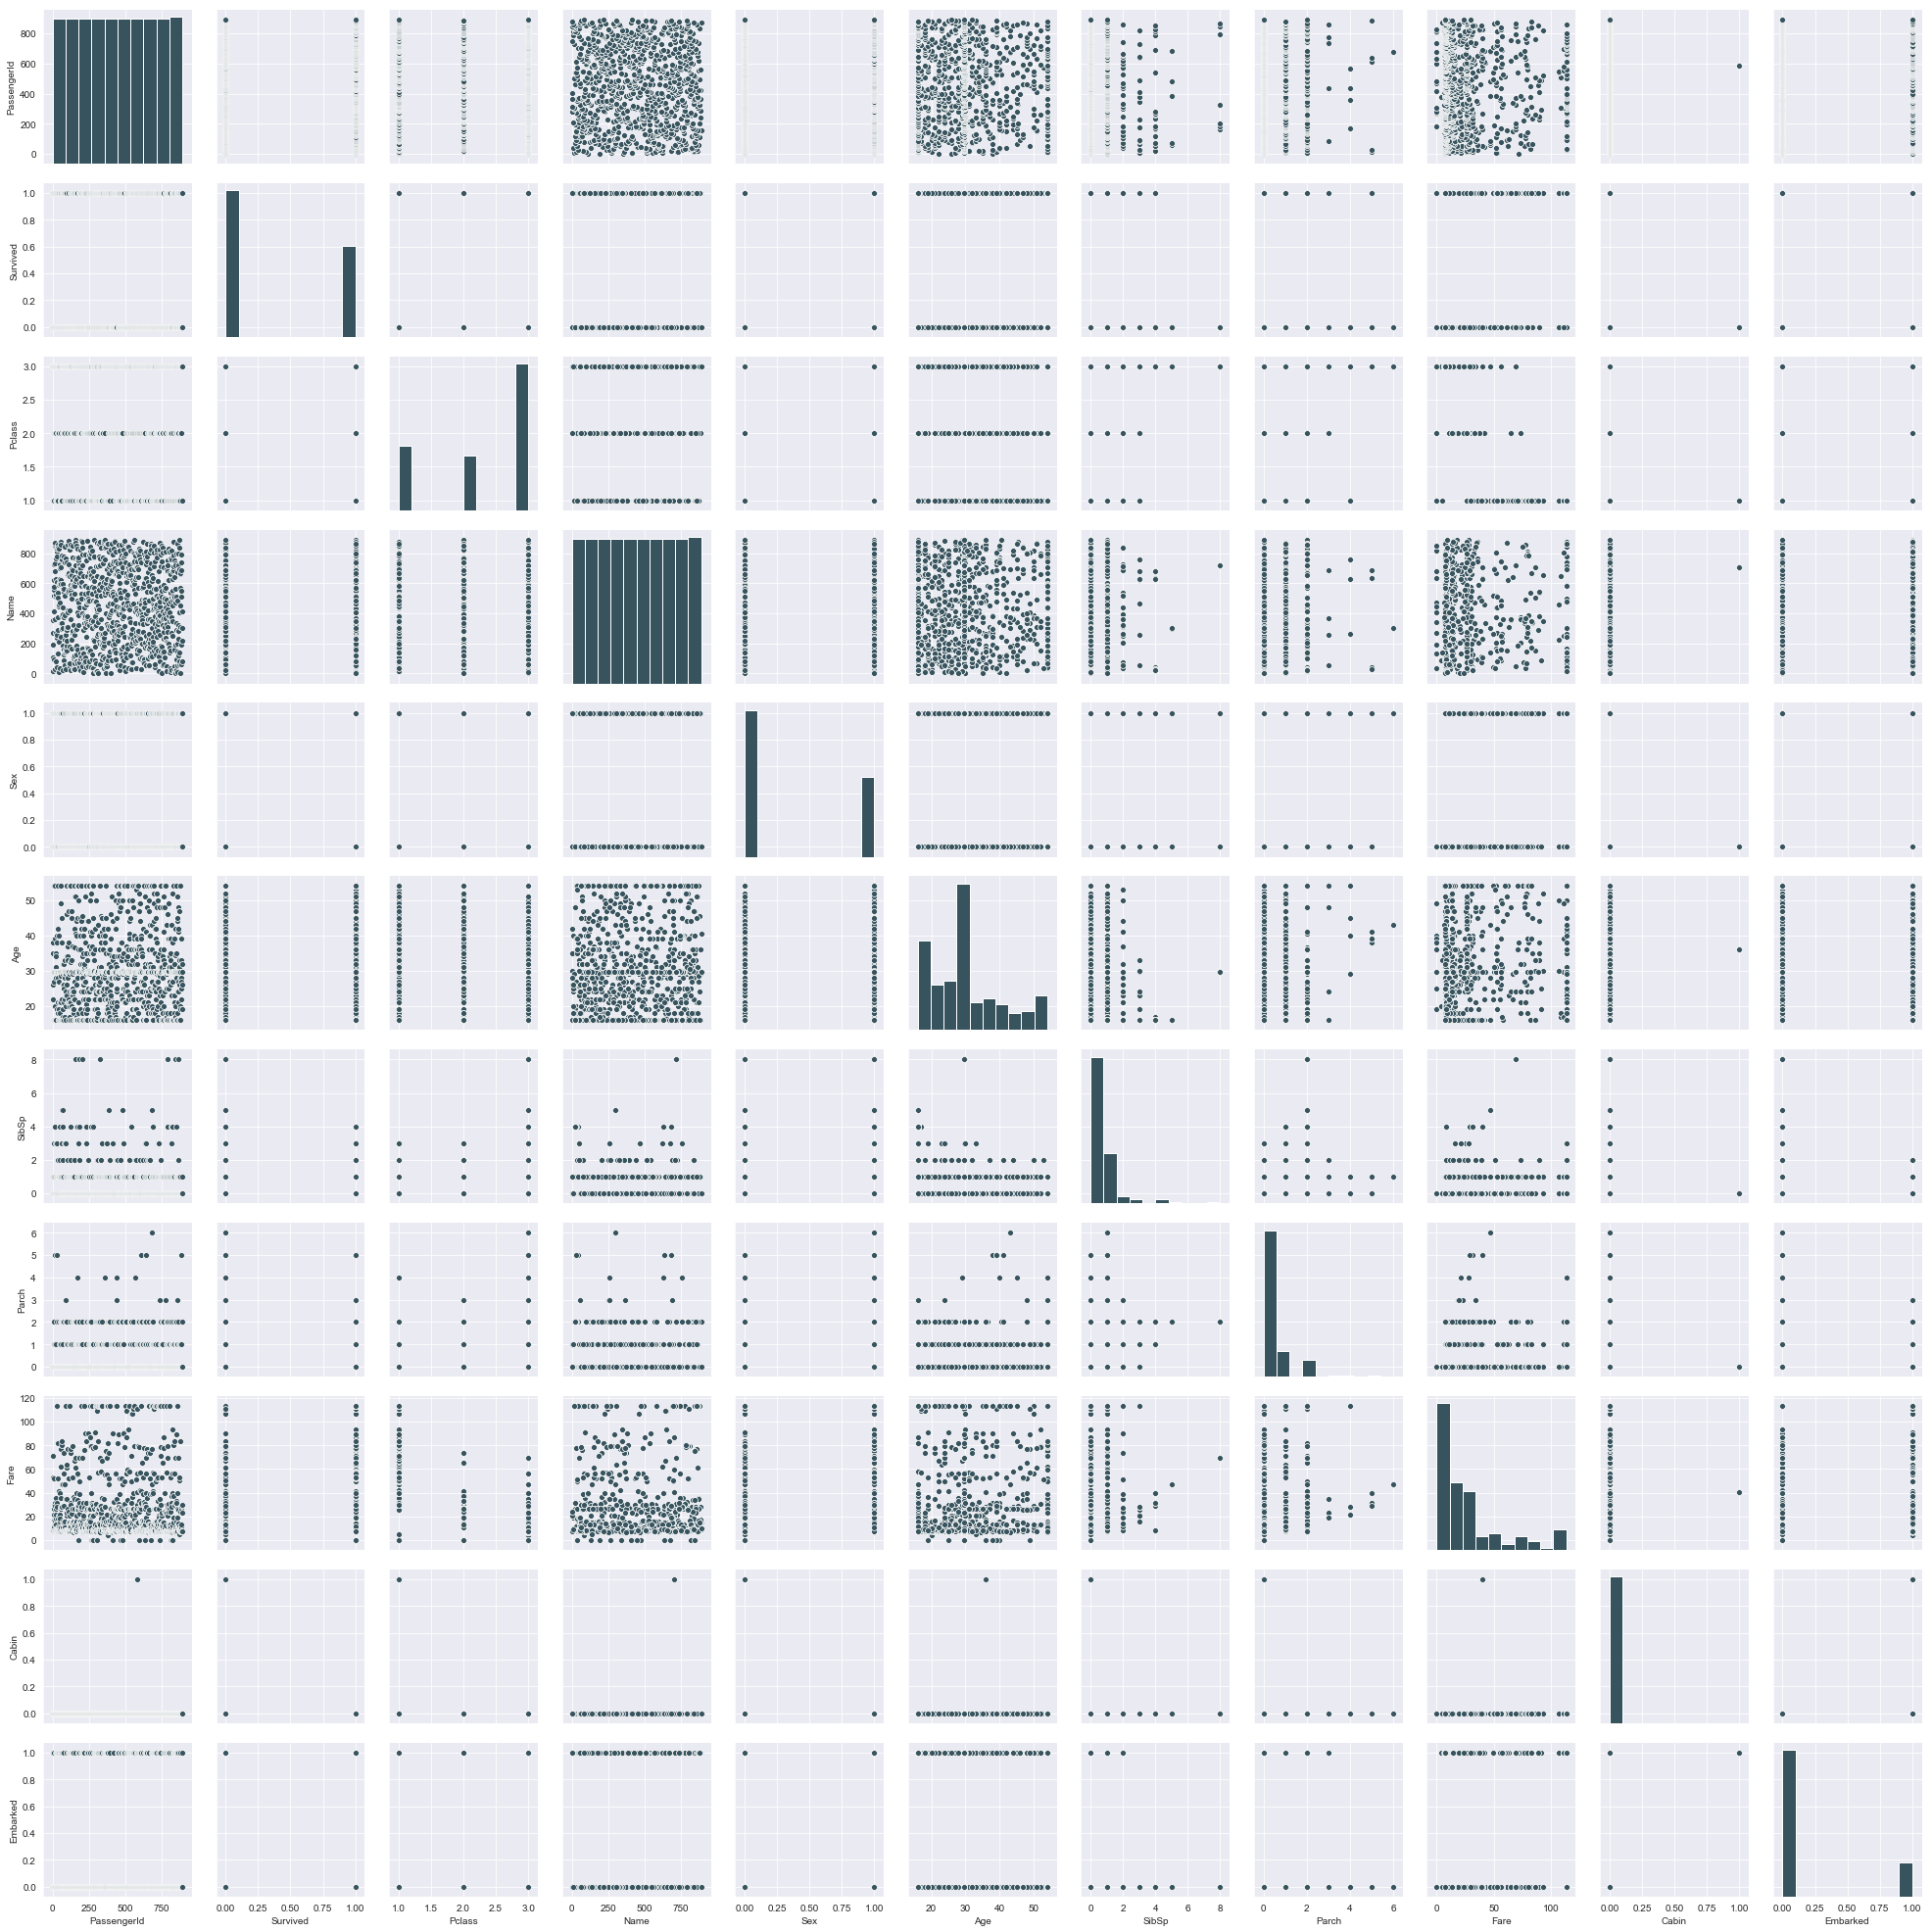

In [37]:
sns.pairplot(df)

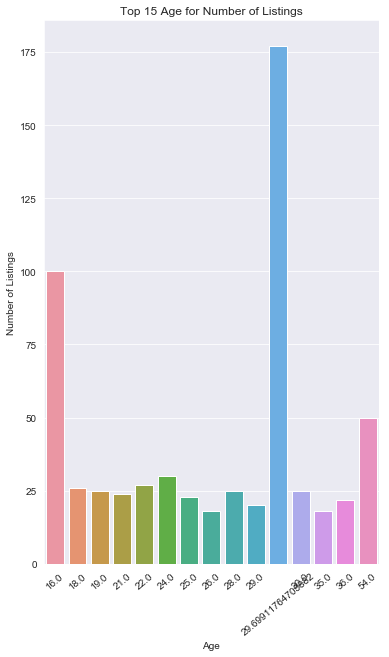

In [38]:
plt.figure(figsize=(6,10))

sns.barplot(x=df['Age'].value_counts().nlargest(15).index, 
            y=df['Age'].value_counts().nlargest(15))

plt.xticks(rotation=30)
plt.title('Top 15 Age for Number of Listings')
plt.xlabel('Age')
plt.ylabel('Number of Listings')
plt.xticks(rotation=40)
plt.show()

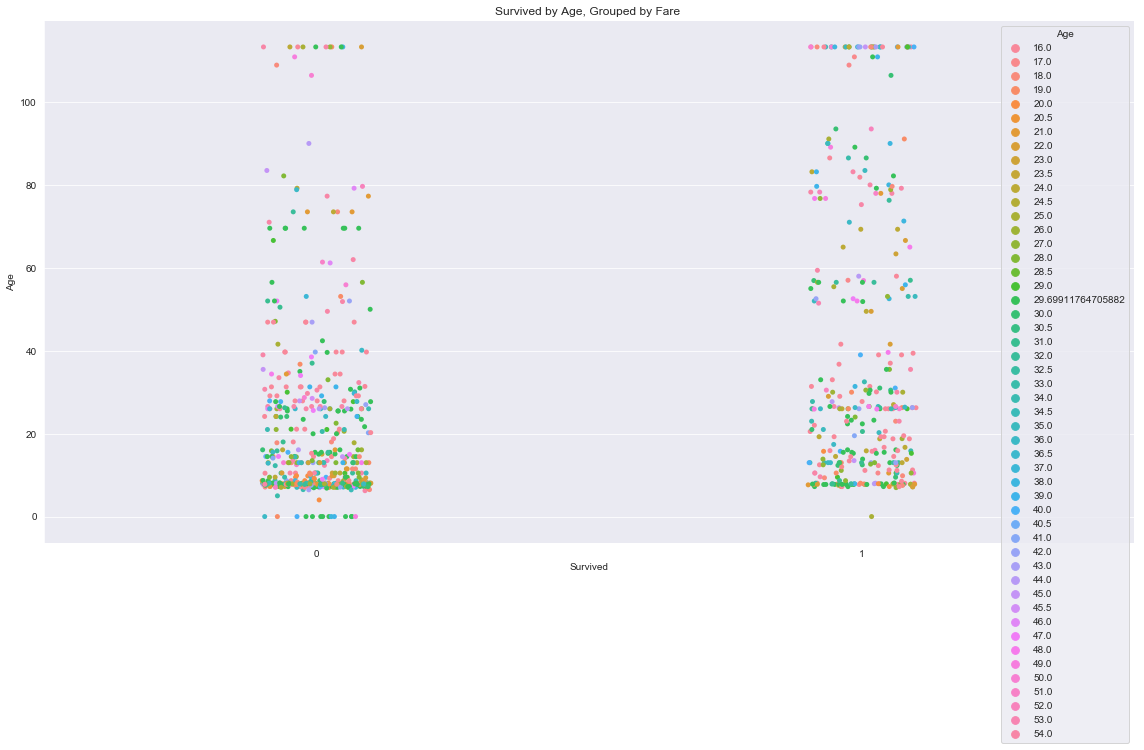

In [59]:
sns.catplot(x='Survived', 
            y='Fare', 
            data=df, 
            height=8,
            hue ='Age',
            aspect=2,
            legend_out=False)

plt.title('Survived by Age, Grouped by Fare ')
plt.ylabel('Age')
plt.xlabel('Survived')
plt.show()

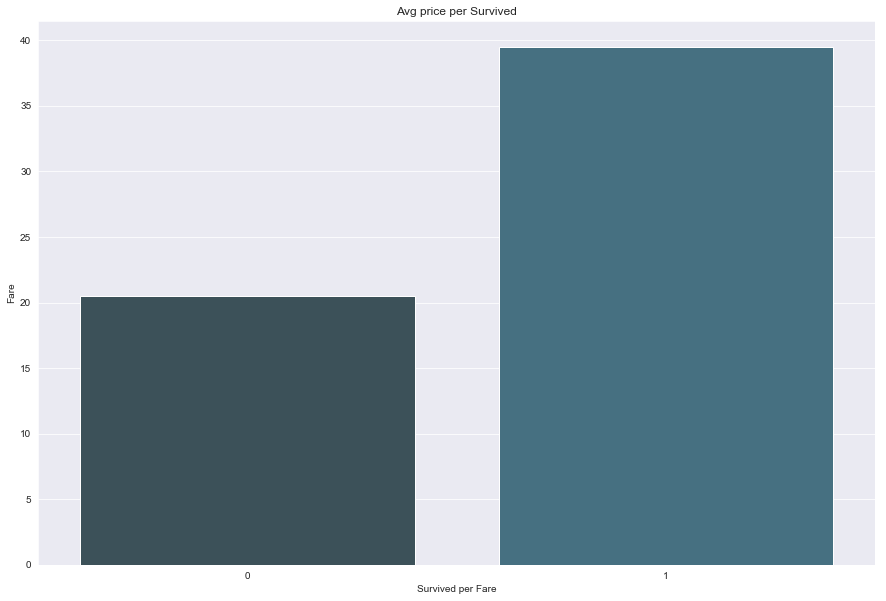

In [63]:
plt.figure(figsize=(15,10))

sns.barplot(x=df.groupby('Survived')['Fare'].mean().index, 
            y=df.groupby('Survived')['Fare'].mean())

plt.title(
    'Avg price per {}'.format('Survived'.title())
    )

plt.xlabel('Survived per Fare')
plt.ylabel('Fare')
plt.show()

### Those who paid more certainly had more chances of surviving.

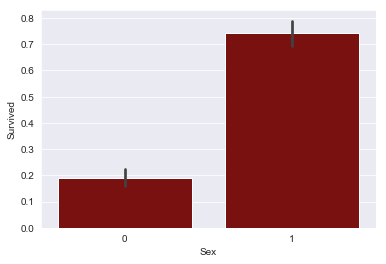

In [69]:
sns.barplot(x='Sex', y='Survived', color = 'darkred', data= df)
plt.show()

#### The dummy variable that classified the respective sex as 1 has more survival rate when compared to 0.

# Data Modeling 

### KNN Classifier Modeling

In [ ]:
# ## Creating interaction between the top correlated variables.
# google_df["int_r_p"] = google_df["Reviews"] * google_df["Price"]
# google_df["int_r_i"] = google_df["Reviews"] * google_df["Installs"]

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived', 1), df["Survived"], test_size = 0.20)

In [73]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=24)
knn.fit(X_train, y_train)

print(knn.score(X_train, y_train))

knn_w = neighbors.KNeighborsClassifier(n_neighbors=24, weights='distance')
knn_w.fit(X_train, y_train)

print(knn_w.score(X_train, y_train))

0.6376404494382022
1.0


### Boosting Model, Let's use ensemble to get better results.

In [78]:
from sklearn import ensemble
params_new = {'n_estimators': 1000,
          'max_depth': 3,
          'loss': 'exponential'}

# Initialize and fit the model.
clb = ensemble.GradientBoostingClassifier(**params_new)
clb.fit(X_train, y_train)

predict_train_new = clb.predict(X_train)
predict_test_new = clb.predict(X_test)

clb.score(X_test, y_test)

0.8212290502793296

In [90]:
from sklearn.metrics import precision_score, recall_score

print('precision score is:{}'.format(precision_score(y_test,predict_test_new)))
print('-----------------------------------------')
print('recall score is:{}'.format(recall_score(y_test,predict_test_new)))

precision score is:0.7931034482758621
-----------------------------------------
recall score is:0.696969696969697


### Random Forest Classifier. Let's do a gridsearch to find the right n parameters.

In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors

knn_g = neighbors.KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
grid_range = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn_g, grid_range, cv=10)
#fit model to data
knn_gscv.fit(X_train, y_train)

/Users/sajithgowthaman/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [98]:
knn_gscv.best_params_

{'n_neighbors': 2}

In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

lr = RandomForestClassifier(n_estimators=42)
lr.fit(X_train,y_train)
predictions_lr = lr.predict(X_test)
report = classification_report(y_test, predictions_lr)

print(report)

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       113
           1       0.85      0.71      0.78        66

    accuracy                           0.85       179
   macro avg       0.85      0.82      0.83       179
weighted avg       0.85      0.85      0.85       179



In [113]:
lr.score(X_test, y_test)

0.8491620111731844

## Logistic Regression

In [119]:
from sklearn.linear_model import LogisticRegression

lrb = LogisticRegression(solver='lbfgs', penalty='l2', max_iter = 1000, random_state = 40)
lrb.fit(X_train, y_train)

test_score = lrb.score(X_test, y_test)
train_score = lrb.score(X_train, y_train)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

Score on training data:  0.8146067415730337
Score on test data:  0.776536312849162
